# KCHOL - Koc Holding AS

In [1]:
from data_functions import *

I will be giving investment recommendations for the company KCHOL in this notebook with price predictions using an LSTM model. I will be predicting daily, weekly, and monthly prices for the year 2021 and giving investment recommendations using bollinger bands with the price predictions.

# Data Preparation

In [2]:
KCHOL = pd.read_csv('./Data/Turkey - Koc Holding AS (KCHOL).csv')
KCHOL

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",19.41,19.42,19.63,19.27,13.14M,-0.46%
1,"Mar 30, 2021",19.5,19.12,19.81,19.03,21.05M,2.09%
2,"Mar 29, 2021",19.1,19.24,19.67,19.1,16.56M,-0.78%
3,"Mar 26, 2021",19.25,20.28,20.36,19.1,21.35M,-3.85%
4,"Mar 25, 2021",20.02,20.5,20.86,20.02,15.93M,-1.48%
...,...,...,...,...,...,...,...
311,"Jan 07, 2020",19.93,20.22,20.28,19.92,2.89M,-0.75%
312,"Jan 06, 2020",20.08,20.34,20.34,19.97,1.94M,-1.08%
313,"Jan 03, 2020",20.3,20.3,20.44,19.97,3.31M,-0.39%
314,"Jan 02, 2020",20.38,20.42,20.44,20.24,2.53M,0.30%


In [3]:
KCHOL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      316 non-null    object
 1   Price     316 non-null    object
 2   Open      316 non-null    object
 3   High      316 non-null    object
 4   Low       316 non-null    object
 5   Vol.      315 non-null    object
 6   Change %  315 non-null    object
dtypes: object(7)
memory usage: 17.4+ KB


In [4]:
## drop last row because it doesn't contain relevant information

KCHOL.drop(315, inplace=True)

In [5]:
## change date column to datetime

KCHOL['Date'] = pd.to_datetime(KCHOL['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

KCHOL['Price'] = KCHOL['Price'].astype(float)
KCHOL['Open'] = KCHOL['Open'].astype(float)
KCHOL['High'] = KCHOL['High'].astype(float)
KCHOL['Low'] = KCHOL['Low'].astype(float)

In [7]:
KCHOL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      315 non-null    datetime64[ns]
 1   Price     315 non-null    float64       
 2   Open      315 non-null    float64       
 3   High      315 non-null    float64       
 4   Low       315 non-null    float64       
 5   Vol.      315 non-null    object        
 6   Change %  315 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 19.7+ KB


In [8]:
KCHOL.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
KCHOL

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.30%
1,2020-01-03,20.30,20.30,20.44,19.97,3.31M,-0.39%
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-1.08%
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.75%
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.05%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.50,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.10,21.35M,-3.85%
312,2021-03-29,19.10,19.24,19.67,19.10,16.56M,-0.78%
313,2021-03-30,19.50,19.12,19.81,19.03,21.05M,2.09%


In [9]:
## find rows for 2021 data

KCHOL.loc[KCHOL['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
252,2021-01-04,21.20,21.12,21.50,21.04,10.53M,0.38%
253,2021-01-05,21.14,21.00,21.60,20.86,15.65M,-0.28%
254,2021-01-06,21.14,21.24,21.34,20.86,12.23M,0.00%
255,2021-01-07,21.10,21.20,21.26,20.88,7.91M,-0.19%
256,2021-01-08,21.52,21.22,21.52,21.12,10.36M,1.99%
...,...,...,...,...,...,...,...
310,2021-03-25,20.02,20.50,20.86,20.02,15.93M,-1.48%
311,2021-03-26,19.25,20.28,20.36,19.10,21.35M,-3.85%
312,2021-03-29,19.10,19.24,19.67,19.10,16.56M,-0.78%
313,2021-03-30,19.50,19.12,19.81,19.03,21.05M,2.09%


I'm going to be putting the first 3 dates of 2021 into the training set so the length of the testing set is 60. This is so the weekly and monthly test data sets have a uniform shape.

In [10]:
## split training data and testing data, testing data will be the year of 2021

training_data = KCHOL[['Date', 'Price']][:255]
testing_data = KCHOL[['Date', 'Price']][255:]

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(KCHOL[['Price']])
scaled_train_data = scaled_data[:255]

# Daily

In [28]:
X_train, y_train = get_train_data(scaled_train_data, 7)
X_test, y_test = get_test_data(KCHOL, testing_data, scaler, 7)

In [29]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [30]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [31]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.11730613559484482
Epoch  1 MSE:  0.048519447445869446
Epoch  2 MSE:  0.05403555557131767
Epoch  3 MSE:  0.04124964773654938
Epoch  4 MSE:  0.0360172837972641
Epoch  5 MSE:  0.03844752535223961
Epoch  6 MSE:  0.039320219308137894
Epoch  7 MSE:  0.03685259819030762
Epoch  8 MSE:  0.032622866332530975
Epoch  9 MSE:  0.02918805181980133
Epoch  10 MSE:  0.028988976031541824
Epoch  11 MSE:  0.02870878018438816
Epoch  12 MSE:  0.022906476631760597
Epoch  13 MSE:  0.01684415154159069
Epoch  14 MSE:  0.01362919807434082
Epoch  15 MSE:  0.009520684368908405
Epoch  16 MSE:  0.005400513298809528
Epoch  17 MSE:  0.011939683929085732
Epoch  18 MSE:  0.009575380943715572
Epoch  19 MSE:  0.012876180000603199
Epoch  20 MSE:  0.007761955261230469
Epoch  21 MSE:  0.006874028127640486
Epoch  22 MSE:  0.0069293733686208725
Epoch  23 MSE:  0.004993095528334379
Epoch  24 MSE:  0.005818736273795366
Epoch  25 MSE:  0.007070316467434168
Epoch  26 MSE:  0.007045648526400328
Epoch  27 MSE:  0.006

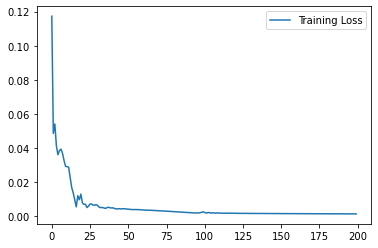

In [32]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [33]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.40 RMSE
Test Score: 0.57 RMSE


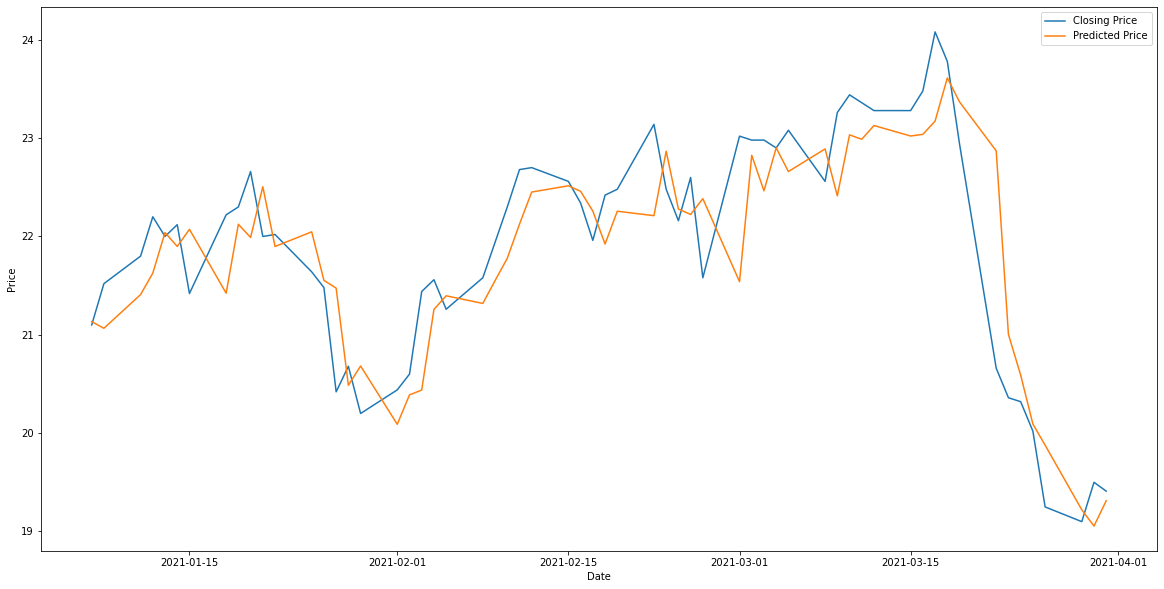

In [34]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The daily price predictions are very accurate. Let's see if we can turn a profit using bollinger bands with this data.

In [35]:
boll_daily = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 20)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 20)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/2333339413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/2333339413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/2333339413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,20.092724,22.499995,24.398887,20.601103
311,2021-03-26,19.877941,22.374657,24.607201,20.142114
312,2021-03-29,19.220608,22.258667,24.880767,19.636568
313,2021-03-30,19.054819,22.070132,25.039823,19.100440


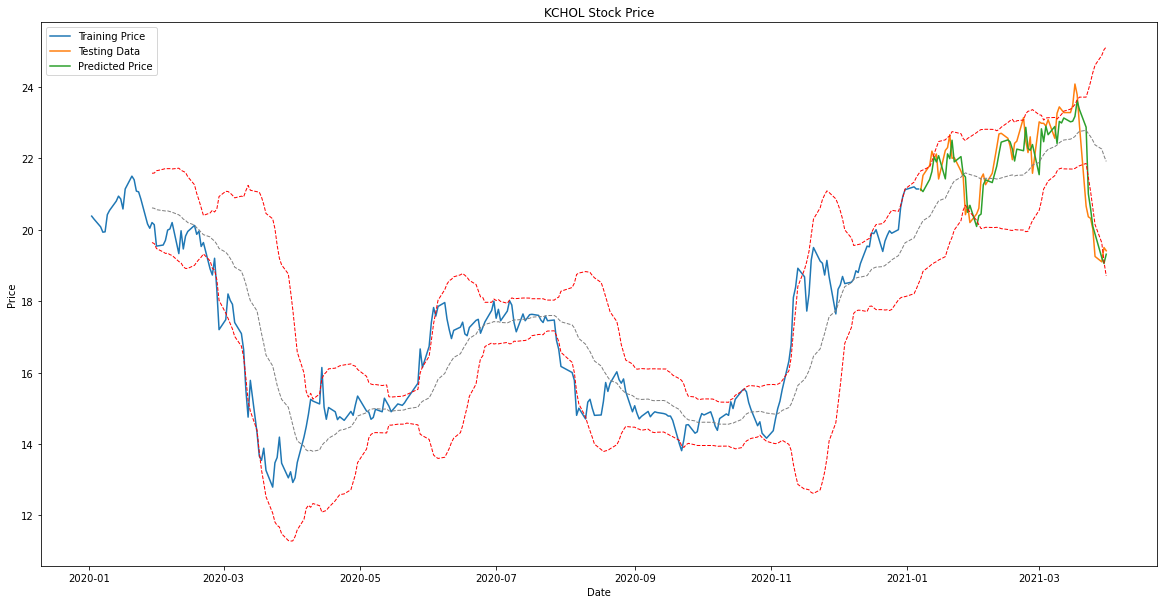

In [36]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

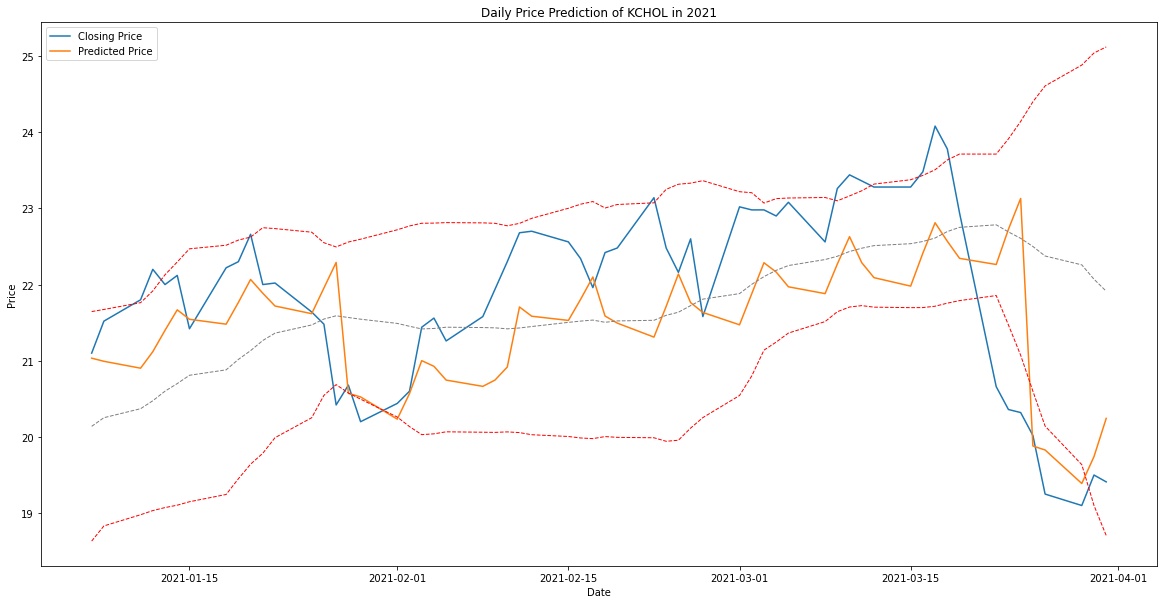

In [63]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][255:], boll_daily['upper_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][255:], boll_daily['lower_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][255:], boll_daily['SMA'][255:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()

The investment strategy with bollinger bands is to buy when price hits the lower band and sell when price hits the upper band. It looks like there are a couple buy indicators late January and at the end of March, and a sell indicator mid March.

In [39]:
i_df = boll_daily[boll_daily['Date'] > '2021-01-06']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/1778831946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-07,21.134268,20.139213,21.645429,18.632998,21.10
256,2021-01-08,21.066309,20.252529,21.673089,18.831968,21.52
257,2021-01-11,21.408899,20.370474,21.762054,18.978893,21.80
258,2021-01-12,21.627039,20.474826,21.916305,19.033347,22.20
259,2021-01-13,22.039900,20.600821,22.128813,19.072829,22.00
260,2021-01-14,21.898335,20.700237,22.296203,19.104272,22.12
261,2021-01-15,22.072510,20.809363,22.469244,19.149482,21.42
262,2021-01-18,21.423162,20.880521,22.516153,19.244889,22.22
263,2021-01-19,22.124063,21.017224,22.583892,19.450557,22.30
264,2021-01-20,21.989614,21.132705,22.622974,19.642436,22.66


In [40]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
270,2021-01-28,20.486645,21.567493,22.558139,20.576847,20.68
272,2021-02-01,20.090031,21.490122,22.718946,20.261298,20.44
308,2021-03-23,21.003719,22.690939,23.912074,21.469805,20.36
309,2021-03-24,20.590614,22.606526,24.140843,21.072208,20.32
310,2021-03-25,20.092724,22.499995,24.398887,20.601103,20.02
311,2021-03-26,19.877941,22.374657,24.607201,20.142114,19.25
312,2021-03-29,19.220608,22.258667,24.880767,19.636568,19.10
313,2021-03-30,19.054819,22.070132,25.039823,19.100440,19.50


In [41]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price


In [42]:
i_df[i_df['Date'] == '2021-03-18']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
305,2021-03-18,23.612133,22.695556,23.635271,21.755841,23.78


The first buy indicator I will use is at the lowest predicted price on 02-01-2021 at a closing price of \\$20.44. The sell indicator I will use is when the upper bollinger band seems to hit the peak of the predicted price on 03-18-2021 at a closing price fo \\$23.78. This results in a profit of 16.3%.

I would also recommend buying again on 03-30-2021 at a closing price of \\$19.50.

## Weekly

In [53]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [54]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)
X_test_w, y_test_w = get_weekly_test_data(KCHOL, testing_data, scaler, 10)

In [55]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [56]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1925046741962433
Epoch  1 MSE:  0.12123602628707886
Epoch  2 MSE:  0.05214117094874382
Epoch  3 MSE:  0.14024154841899872
Epoch  4 MSE:  0.03892338275909424
Epoch  5 MSE:  0.04397958889603615
Epoch  6 MSE:  0.060851458460092545
Epoch  7 MSE:  0.06459104269742966
Epoch  8 MSE:  0.0600319467484951
Epoch  9 MSE:  0.052355438470840454
Epoch  10 MSE:  0.045145176351070404
Epoch  11 MSE:  0.040679071098566055
Epoch  12 MSE:  0.03932017460465431
Epoch  13 MSE:  0.03923163563013077
Epoch  14 MSE:  0.03848521411418915
Epoch  15 MSE:  0.036875128746032715
Epoch  16 MSE:  0.03529106080532074
Epoch  17 MSE:  0.03445073962211609
Epoch  18 MSE:  0.03440004959702492
Epoch  19 MSE:  0.03472388908267021
Epoch  20 MSE:  0.0349307581782341
Epoch  21 MSE:  0.03469354659318924
Epoch  22 MSE:  0.03391643986105919
Epoch  23 MSE:  0.03270221874117851
Epoch  24 MSE:  0.03127748891711235
Epoch  25 MSE:  0.029899025335907936
Epoch  26 MSE:  0.028749218210577965
Epoch  27 MSE:  0.0278363917022943

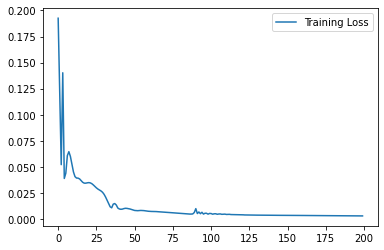

In [57]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [58]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.52 RMSE
Test Score: 20.69 RMSE


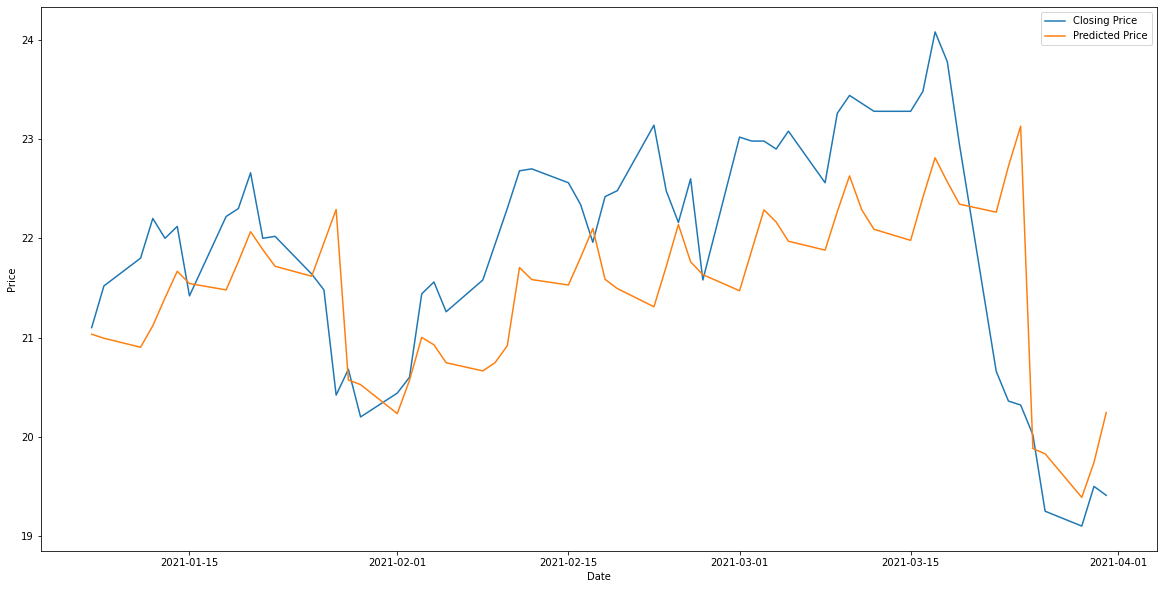

In [59]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The weekly data is not as accurate as the daily predictions but it seems to follow the general trend of the closing price. Let's see if we can turn a profit using this data.

In [60]:
boll_weekly = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 20)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/752737193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/752737193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/752737193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,19.881094,22.133885,23.462374,20.805395
311,2021-03-26,19.828665,22.043618,23.715956,20.371281
312,2021-03-29,19.389112,21.939475,23.980481,19.898470
313,2021-03-30,19.742054,21.832623,24.098329,19.566917


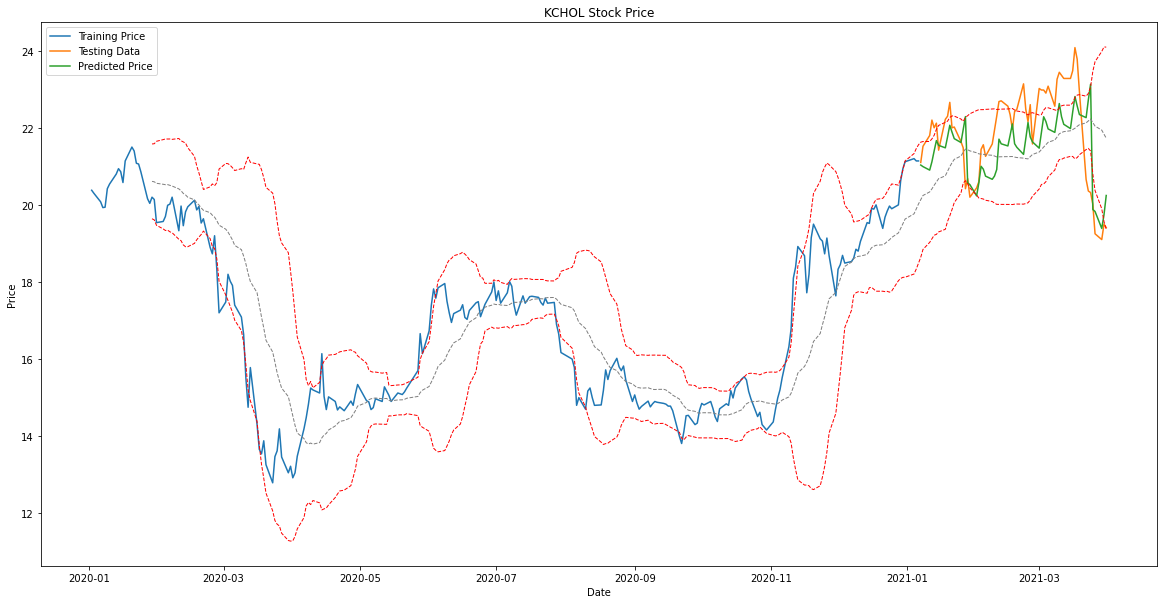

In [61]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

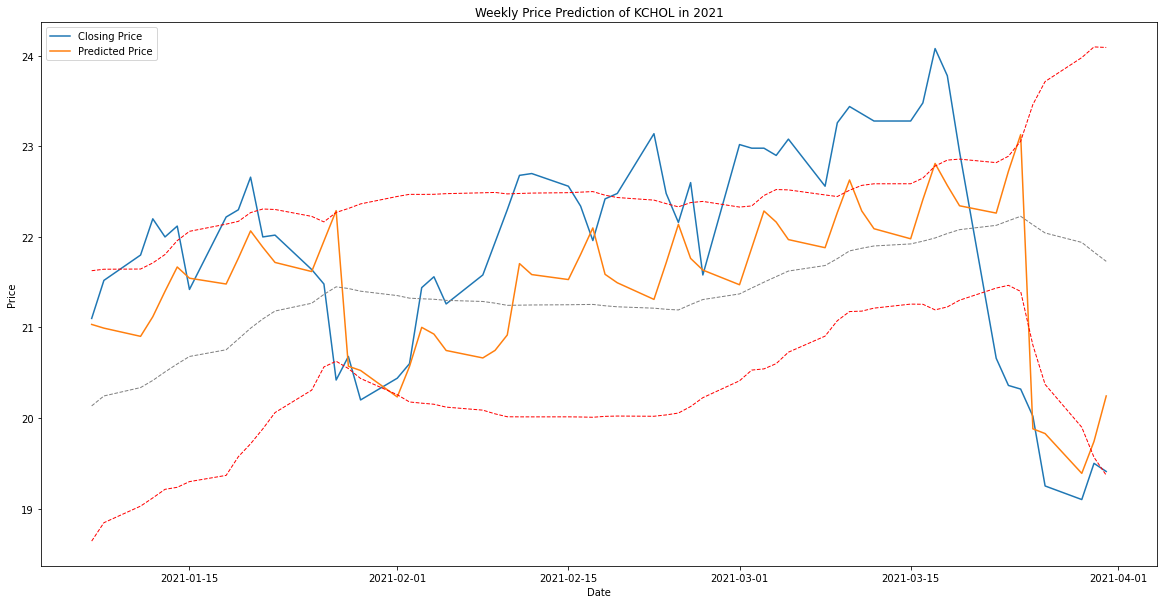

In [64]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][255:], boll_weekly['upper_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][255:], boll_weekly['lower_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][255:], boll_weekly['SMA'][255:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()

Looks like the buy indicators are similar to the daily predictions, however there are multiple sell indicators that we can use.

In [65]:
i_df = boll_weekly[boll_weekly['Date'] > '2021-01-06']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/1271862289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-07,21.033863,20.134193,21.627055,18.641332,21.10
256,2021-01-08,20.992945,20.243840,21.643310,18.844371,21.52
257,2021-01-11,20.902264,20.336454,21.645505,19.027402,21.80
258,2021-01-12,21.118710,20.415389,21.712563,19.118215,22.20
259,2021-01-13,21.399485,20.509363,21.805734,19.212993,22.00
260,2021-01-14,21.668039,20.597265,21.959268,19.235262,22.12
261,2021-01-15,21.544235,20.679977,22.061906,19.298048,21.42
262,2021-01-18,21.480106,20.753982,22.141104,19.366861,22.22
263,2021-01-19,21.765003,20.872732,22.172059,19.573406,22.30
264,2021-01-20,22.066786,20.992072,22.268374,19.715769,22.66


In [66]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
272,2021-02-01,20.233391,21.352473,22.446959,20.257986,20.44
310,2021-03-25,19.881094,22.133885,23.462374,20.805395,20.02
311,2021-03-26,19.828665,22.043618,23.715956,20.371281,19.25
312,2021-03-29,19.389112,21.939475,23.980481,19.898470,19.10


In [67]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
269,2021-01-27,22.290281,21.448927,22.270484,20.627370,20.42
299,2021-03-10,22.628763,21.845849,22.515694,21.176003,23.44
304,2021-03-17,22.811152,21.988623,22.782629,21.194618,24.08
309,2021-03-24,23.129896,22.227971,23.057528,21.398415,20.32


The first buying indicator I will use is on 02-01-2021 at a closing price of \\$20.44. There are multiple sell indicators to use, without prior knowledge of the closing price I would use the sell indicator at the highest predicted price on 03-24-2021 at a price of \\$20.32. This results in a loss of 0.6%.

I would also recommend purchasing at the next buying indicator on 03-29-2021 at a price of \\$19.10.

Although I could have made a profit using a different sell indicator, I chose to use the sell indicator at the highest predicted closing price because the actual closing price would not be known to me in a real world application.

# Monthly

In [112]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [113]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 55)
X_test_m, y_test_m = get_monthly_test_data(KCHOL, testing_data, scaler, 55)

In [114]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [115]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1416274756193161
Epoch  1 MSE:  0.08773620426654816
Epoch  2 MSE:  0.04720341041684151
Epoch  3 MSE:  0.04268569126725197
Epoch  4 MSE:  0.03191661462187767
Epoch  5 MSE:  0.036897510290145874
Epoch  6 MSE:  0.03578804060816765
Epoch  7 MSE:  0.03375803679227829
Epoch  8 MSE:  0.033516570925712585
Epoch  9 MSE:  0.03233659639954567
Epoch  10 MSE:  0.030011482536792755
Epoch  11 MSE:  0.02867603302001953
Epoch  12 MSE:  0.028537463396787643
Epoch  13 MSE:  0.028599314391613007
Epoch  14 MSE:  0.028217749670147896
Epoch  15 MSE:  0.027493620291352272
Epoch  16 MSE:  0.02690655179321766
Epoch  17 MSE:  0.026579249650239944
Epoch  18 MSE:  0.025729535147547722
Epoch  19 MSE:  0.023943766951560974
Epoch  20 MSE:  0.02225564233958721
Epoch  21 MSE:  0.020718226209282875
Epoch  22 MSE:  0.030176367610692978
Epoch  23 MSE:  0.02425924688577652
Epoch  24 MSE:  0.02624540962278843
Epoch  25 MSE:  0.023104913532733917
Epoch  26 MSE:  0.02035772241652012
Epoch  27 MSE:  0.02117705

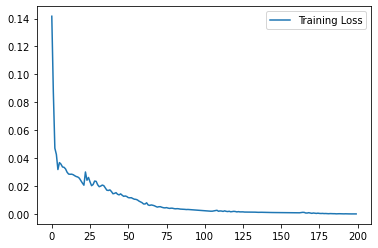

In [116]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [117]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.80 RMSE
Test Score: 21.36 RMSE


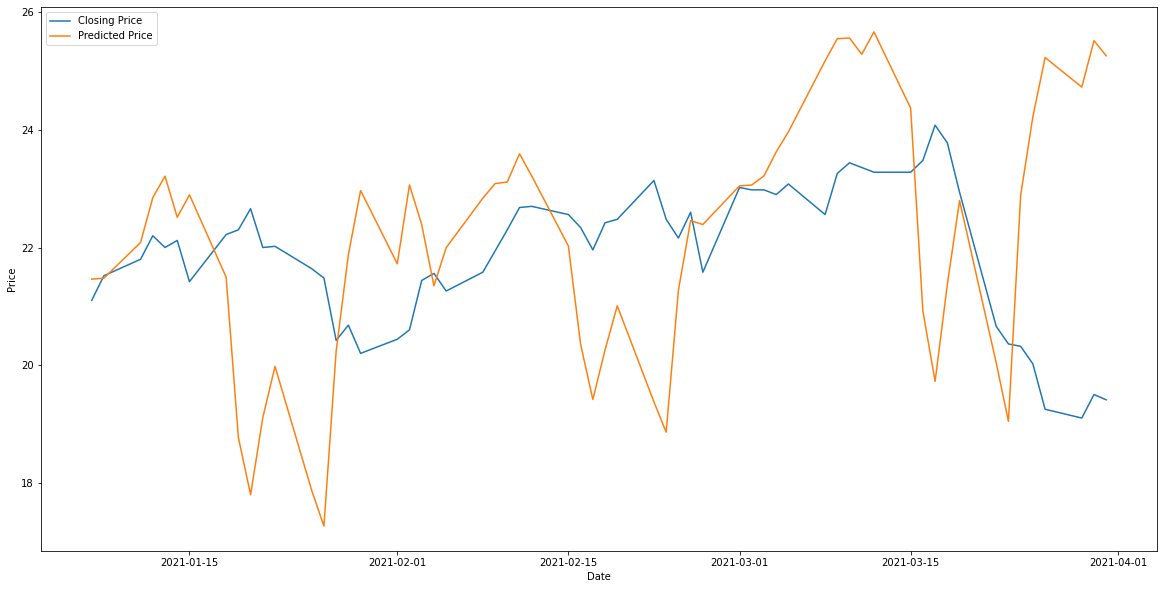

In [118]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

The monthly price predictions are very inaccurate with the price fluctuating wildly around the closing price. Let's see if we can turn a profit using this data.

In [125]:
boll_monthly = KCHOL[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 20)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/3880725436.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/3880725436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 20)
C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/3880725436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,20.380000,NaN,NaN,NaN
1,2020-01-03,20.300000,NaN,NaN,NaN
2,2020-01-06,20.080000,NaN,NaN,NaN
3,2020-01-07,19.930000,NaN,NaN,NaN
4,2020-01-08,19.940000,NaN,NaN,NaN
...,...,...,...,...,...
310,2021-03-25,24.224054,23.096487,27.128576,19.064398
311,2021-03-26,25.230385,23.238446,27.364801,19.112091
312,2021-03-29,24.727848,23.322430,27.500527,19.144332
313,2021-03-30,25.516859,23.445151,27.733816,19.156486


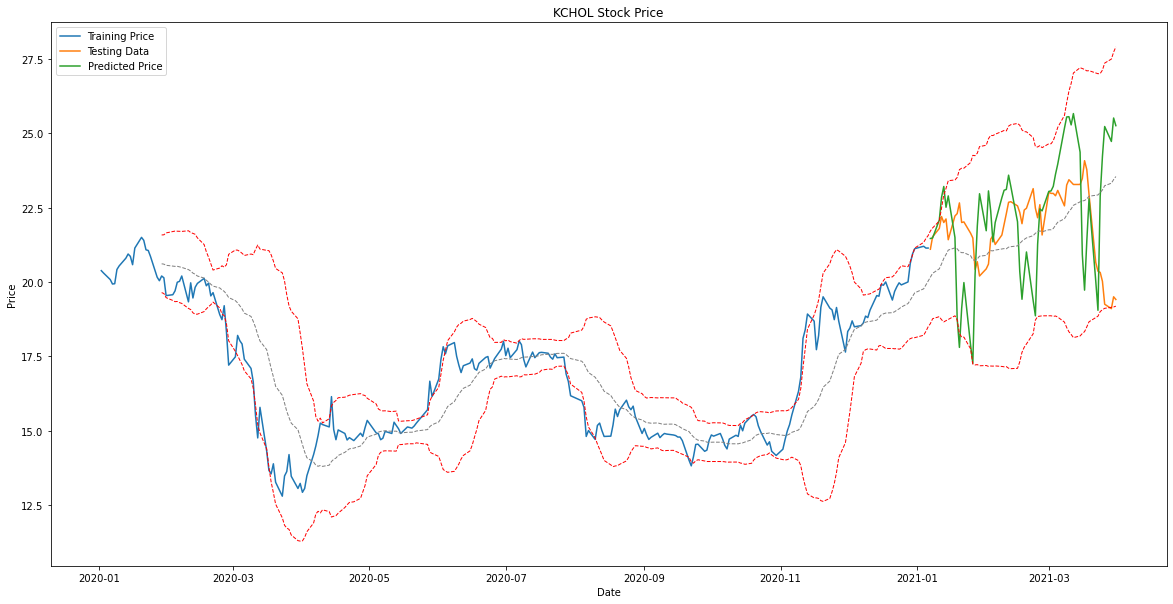

In [126]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KCHOL Stock Price')
plt.legend()
plt.show()

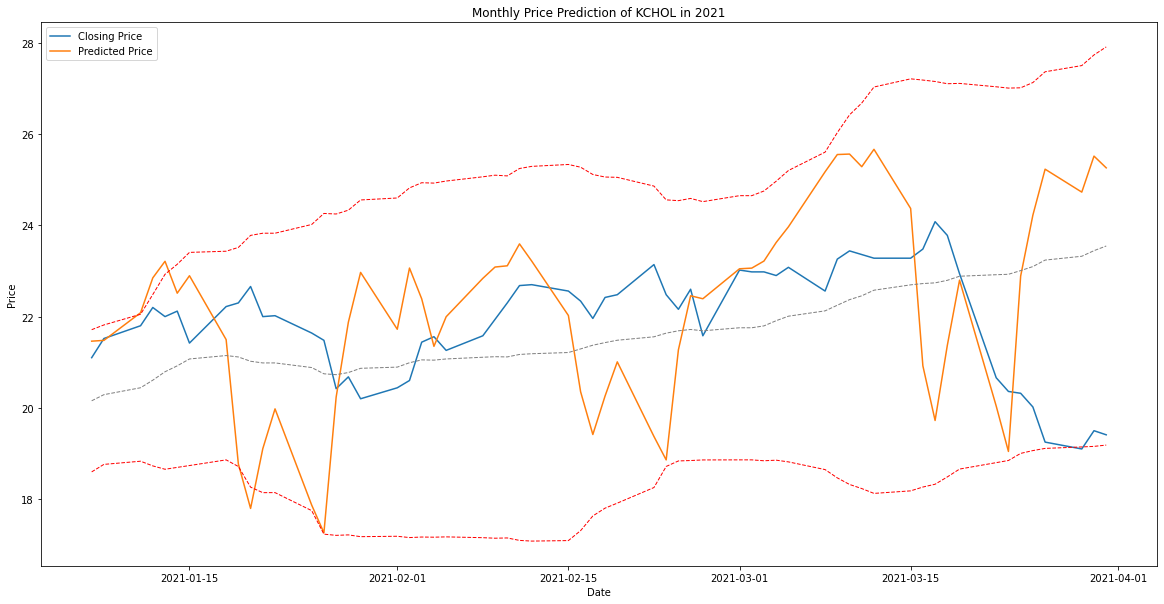

In [127]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][255:], boll_monthly['upper_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][255:], boll_monthly['lower_bb'][255:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][255:], boll_monthly['SMA'][255:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of KCHOL in 2021')
plt.legend()
plt.show()

There are a couple buy indicators that we can use and there is one sell indicator we can use in early March, although the price does not actually hit the upper bollinger band. The sell indicators before a buy indicator are unusable because we would not be able to purchase the stock beforehand.

In [128]:
i_df = boll_monthly[boll_monthly['Date'] > '2021-01-06']
i_df['Actual_Price'] = testing_data['Price']
i_df

C:\Users\Chris\AppData\Local\Temp/ipykernel_6712/3943431930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['Actual_Price'] = testing_data['Price']


,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
255,2021-01-07,21.461864,20.155593,21.713606,18.597581,21.10
256,2021-01-08,21.478949,20.289541,21.817178,18.761903,21.52
257,2021-01-11,22.084957,20.441289,22.051223,18.831354,21.80
258,2021-01-12,22.848688,20.606723,22.484423,18.729023,22.20
259,2021-01-13,23.212378,20.791342,22.927454,18.655229,22.00
260,2021-01-14,22.513393,20.921511,23.146913,18.696110,22.12
261,2021-01-15,22.895758,21.071799,23.407150,18.736448,21.42
262,2021-01-18,21.496227,21.146611,23.432739,18.860483,22.22
263,2021-01-19,18.771235,21.115672,23.515799,18.715545,22.30
264,2021-01-20,17.796902,21.021518,23.779804,18.263231,22.66


In [129]:
## find buying indicators

i_df[i_df['lower_bb'] >= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
264,2021-01-20,17.796902,21.021518,23.779804,18.263231,22.66


In [134]:
i_df[i_df['Date'] == '2021-01-26']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
268,2021-01-26,17.263016,20.746913,24.260591,17.233235,21.48


In [130]:
## find selling indicators

i_df[i_df['upper_bb'] <= i_df['Price']]

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
257,2021-01-11,22.084957,20.441289,22.051223,18.831354,21.8
258,2021-01-12,22.848688,20.606723,22.484423,18.729023,22.2
259,2021-01-13,23.212378,20.791342,22.927454,18.655229,22.0


In [133]:
i_df[i_df['Date'] == '2021-03-08']

,Date,Price,SMA,upper_bb,lower_bb,Actual_Price
297,2021-03-08,25.173193,22.125889,25.603797,18.647981,22.56


The buy indicator I would use is on 01-26-2021 with a closing price of \\$21.48. The sell indicator I would use is on 03-08-2021 with a closing price of \\$22.56. This would result in a profit of 5%.

Even with some very inaccurate price predictions, we were still able to turn a profit.

# Conclusion

Using price predictions with an LSTM model on KCHOL, I was able to able to make a profit of 16.3% on the daily price predictions with bollinger bands. The weekly and monthly predictions did not perform as well with the weekly predictions leading to a loss of 0.5% and the monthly predictions leading to a profit of only 5%.

I would recommend an investment strategy using the indicators given with the daily price predictions. Using this strategy leads to a profit of 16.3%.